In [207]:
import pandas as pd
import plotly.express as px  # For Plotly Express, which is easy-to-use for quick visualizations
import plotly.graph_objects as go 
import seaborn as sns
import matplotlib.pyplot as plt
import functions

In [238]:
# Load the data
country_df = pd.read_excel("../data/raw/numbeo_stats.xlsx", sheet_name=1)
print(country_df.head())
country_df.columns = country_df.columns.str.strip()
display(country_df.columns)

               Unnamed: 0 Country      2019     2020     2021     2022  \
0  1 bed apartment (rent)       PT   727.16   690.16   677.24   802.66   
1                     NaN       DE   833.65   844.54   850.07   908.01   
2                     NaN       FR   827.61   848.22   820.06   820.66   
3  3 bed apartment (rent)       PT  1374.06  1196.87  1216.46  1396.72   
4                     NaN       DE  1574.66  1632.03  1675.07  1687.72   

      2023     2024  
0   967.85   925.52  
1   986.39   886.44  
2   862.08   754.73  
3  1734.01  1632.07  
4  1824.63  1259.65  


Index(['Unnamed: 0', 'Country', '2019', '2020', '2021', '2022', '2023',
       '2024'],
      dtype='object')

In [235]:
# Strip any leading/trailing spaces from the column names
country_df.columns = country_df.columns.str.strip()

# Display the first few rows of the DataFrame to check the exact content and column names
print(country_df.head())

# Filter for rows where the Country is 'FR' (France) 
# and 'Unnamed: 0' contains "Av salary (after tax)" or "Min wage (after tax)"
france_df = country_df[(country_df['Country'] == 'FR') & 
                       (country_df['Unnamed: 0'].str.strip().isin(["Av salary (after tax)", "Min wage (after tax)"]))]

# Print the filtered DataFrame for France
print(france_df)

               Unnamed: 0 Country     2019     2020     2021     2022  \
0  1 bed apartment (rent)      PT   727.16   690.16   677.24   802.66   
1                     NaN      DE   833.65   844.54   850.07   908.01   
2                     NaN      FR   827.61   848.22   820.06   820.66   
3  3 bed apartment (rent)      PT  1374.06  1196.87  1216.46  1396.72   
4                     NaN      DE  1574.66  1632.03  1675.07  1687.72   

      2023     2024  
0   967.85   925.52  
1   986.39   886.44  
2   862.08   754.73  
3  1734.01  1632.07  
4  1824.63  1259.65  
Empty DataFrame
Columns: [Unnamed: 0, Country, 2019, 2020, 2021, 2022, 2023, 2024]
Index: []


In [137]:
from functions import concatenate_eurostat_countries, cleaning_eurostat_data_for_viz, clean_countries_numbeo, clean_cities

def adding_minimum_wage(eurostat_df):
    min_wage = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=3)
    min_wage.index = ["Min Wage"] * len(min_wage)
    min_wage_yr = min_wage.select_dtypes(include='number')

    # Multiply only numeric columns by 12
    min_wage_yr = min_wage_yr * 12

    min_wage_yr['Unnamed: 0'] = min_wage['Unnamed: 0']

    # Reorder columns to have 'Country' as the first column
    min_wage_yr = min_wage_yr[['Unnamed: 0'] + [col for col in min_wage_yr.columns if    col != 'Unnamed: 0']]
    min_wage_yr.rename(columns={"Unnamed: 0": "Country"}, inplace=True) 
    eurostat_df = pd.concat([eurostat_df, min_wage_yr])
    return eurostat_df

eurostat_df

,Country,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10
Income,DE,26105.00,29896.00,29106.00,28569.00,30308.00
Income,FR,26210.00,25382.00,26075.00,26419.00,27577.00
Income,PT,11786.00,12696.00,13113.00,13148.00,14368.00


In [131]:
cities = clean_cities()
cities

,Type,City,2019,2020,2021,2022,2023,2024
0,1 bed apartment (rent),Lisbon,894.00,843.29,868.30,1024.46,1259.74,1413.16
1,1 bed apartment (rent),Berlin,905.53,889.28,1036.35,1237.16,1276.16,1186.62
2,1 bed apartment (rent),Paris,1201.81,1222.21,1256.88,1273.16,1333.65,1258.63
3,3 bed apartment (rent),Lisbon,1714.73,1590.85,1628.03,2039.40,2372.69,2642.11
4,3 bed apartment (rent),Berlin,1717.16,1715.00,2038.62,2265.78,1879.18,2253.27
5,3 bed apartment (rent),Paris,2660.91,2752.22,2660.99,2922.45,3013.00,3100.00
6,Buy apartment (per m2 in city center),Lisbon,4342.65,4422.10,4868.25,6097.94,5251.24,5979.57
7,Buy apartment (per m2 in city center),Berlin,6193.00,5989.03,6872.62,8426.66,8147.85,7880.79
8,Buy apartment (per m2 in city center),Paris,11508.28,12195.74,12520.70,12460.36,11844.44,12330.04
9,Av salary (after tax),Lisbon,931.03,1028.22,1034.12,1062.71,1169.53,1235.38


In [133]:
income_tidy, housing_tidy, rental_tidy, income_df, housing_df, rental_df = cleaning_eurostat_data_for_viz(eurostat_df)

# Concatenate the DataFrames into one long DataFrame
combined_data = pd.concat([housing_df, rental_df], axis=0)
df_france = combined_data[combined_data['Country'] == 'FR']
df_france = df_france.reset_index().rename(columns={'index': 'Type'})
df_france_melted = df_france.melt(id_vars=['Type', 'Country'], var_name='Year', value_name='Value')
df_france_melted

,Type,Country,Year,Value
0,Housing,FR,2019,110.86
1,Rental,FR,2019,107.97
2,Housing,FR,2020,116.62
3,Rental,FR,2020,110.76
4,Housing,FR,2021,123.98
5,Rental,FR,2021,101.92
6,Housing,FR,2022,131.82
7,Rental,FR,2022,115.79
8,Housing,FR,2023,131.26
9,Rental,FR,2023,121.05


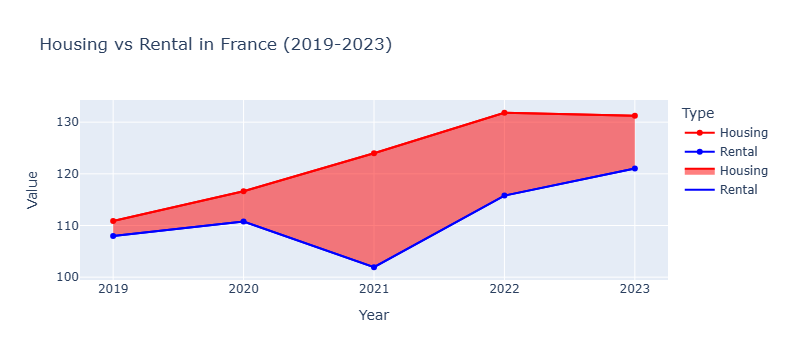

In [266]:
# Create the line plot
fig = px.line(
    df_france_melted,
    x='Year',
    y='Value',
    color='Type',  # Different lines for Housing and Rental
    markers=True,
    title="Housing vs Rental in France (2019-2023)",
    color_discrete_sequence=['red', 'blue']
)

# Create traces for Housing and Rental lines
housing_trace = go.Scatter(
    x=df_france_melted[df_france_melted['Type'] == 'Housing']['Year'],
    y=df_france_melted[df_france_melted['Type'] == 'Housing']['Value'],
    mode='lines',
    name='Housing',
    line=dict(color='red'),
    fill='tonexty',  # Fill the area between this line and the next one (Rental)
)

rental_trace = go.Scatter(
    x=df_france_melted[df_france_melted['Type'] == 'Rental']['Year'],
    y=df_france_melted[df_france_melted['Type'] == 'Rental']['Value'],
    mode='lines',
    name='Rental',
    line=dict(color='blue'),
)

# Add the traces to the figure
fig.add_trace(housing_trace)
fig.add_trace(rental_trace)

# Show the plot
fig.show()


In [38]:
df_paris = cities[cities["City"] == "Paris"]
df_paris

,Type,City,2019,2020,2021,2022,2023,2024
2,1 bed apartment (rent),Paris,1201.81,1222.21,1256.88,1273.16,1333.65,1258.63
5,3 bed apartment (rent),Paris,2660.91,2752.22,2660.99,2922.45,3013.00,3100.00
8,Buy apartment (per m2 in city center),Paris,11508.28,12195.74,12520.70,12460.36,11844.44,12330.04
11,Av salary (after tax),Paris,2308.96,2510.77,2791.18,2601.82,2846.41,3076.78


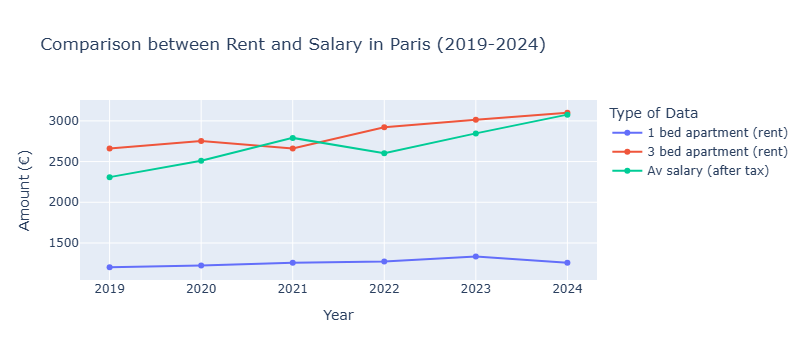

In [42]:
df_rent_salary = df_paris[df_paris['Type'].isin(['1 bed apartment (rent)', '3 bed apartment (rent)', 'Av salary (after tax)'])]
df_rent_salary_melted = df_rent_salary.melt(id_vars=["Type", "City"], var_name="Year", value_name="Value")
fig = px.line(
    df_rent_salary_melted,
    x="Year",              # x-axis: Year
    y="Value",             # y-axis: Value
    color="Type",          # Different lines for different Types (rent and salary)
    markers=True,          # Add markers at each data point
    title="Comparison between Rent and Salary in Paris (2019-2024)", # Title of the chart
    labels={"Value": "Amount (€)", "Year": "Year", "Type": "Type of Data"} # Axis labels
)

# Show the plot
fig.show()

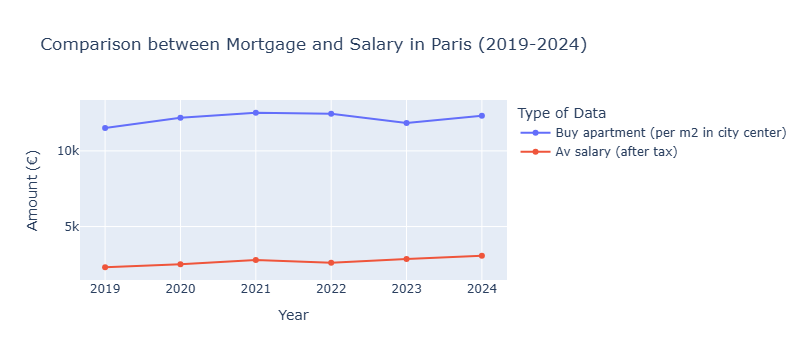

In [68]:
df_buy_salary = df_paris[df_paris['Type'].isin(['Buy apartment (per m2 in city center)', 'Av salary (after tax)'])]
df_buy_salary_melted = df_buy_salary.melt(id_vars=["Type", "City"], var_name="Year", value_name="Value")
fig = px.line(
    df_buy_salary_melted,
    x="Year",              # x-axis: Year
    y="Value",             # y-axis: Value
    color="Type",          # Different lines for different Types (rent and salary)
    markers=True,          # Add markers at each data point
    title="Comparison between Mortgage and Salary in Paris (2019-2024)", # Title of the chart
    labels={"Value": "Amount (€)", "Year": "Year", "Type": "Type of Data"} # Axis labels
)

# Show the plot
fig.show()

NameError: name 'df' is not defined